In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import re
import warnings

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

warnings.filterwarnings('ignore')
#sns.set(style="whitegrid")

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df_full = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [2]:
df = df_full[['id', 'lotarea', 'lotconfig', 'neighborhood', 'overallqual', 'yearremodadd', 'exterior1st',
             'exterior2nd', 'masvnrtype', 'bsmtfintype1', 'bsmtfinsf1', 'totalbsmtsf', 'centralair', 'grlivarea',
             'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath', 'bedroomabvgr', 'kitchenqual',
             'totrmsabvgrd', 'fireplaces', 'garagetype', 'garagecars', 'wooddecksf', 'openporchsf', 
             'enclosedporch', 'screenporch', 'yrsold', 'saleprice']]

In [3]:
#combine the 4 'bath' features into one
df['bath'] = df['bsmtfullbath']+df['bsmthalfbath']+df['fullbath']+df['halfbath']

In [4]:
df = df.drop(['bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath'], axis=1)

In [5]:
#replace blanks in rows with appropriate values
for i, j in df.iterrows():
    if df['masvnrtype'][i] == '':
        df['masvnrtype'][i] = 'None'
    if df['bsmtfintype1'][i] == '':
        df['bsmtfintype1'][i] = 'Unf'
    if df['garagetype'][i] == '':
        df['garagetype'][i] = 'None'

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 27 columns):
id               1460 non-null int64
lotarea          1460 non-null int64
lotconfig        1460 non-null object
neighborhood     1460 non-null object
overallqual      1460 non-null int64
yearremodadd     1460 non-null int64
exterior1st      1460 non-null object
exterior2nd      1460 non-null object
masvnrtype       1452 non-null object
bsmtfintype1     1423 non-null object
bsmtfinsf1       1460 non-null int64
totalbsmtsf      1460 non-null int64
centralair       1460 non-null object
grlivarea        1460 non-null int64
bedroomabvgr     1460 non-null int64
kitchenqual      1460 non-null object
totrmsabvgrd     1460 non-null int64
fireplaces       1460 non-null int64
garagetype       1379 non-null object
garagecars       1460 non-null int64
wooddecksf       1460 non-null int64
openporchsf      1460 non-null int64
enclosedporch    1460 non-null int64
screenporch      1460 non-null in

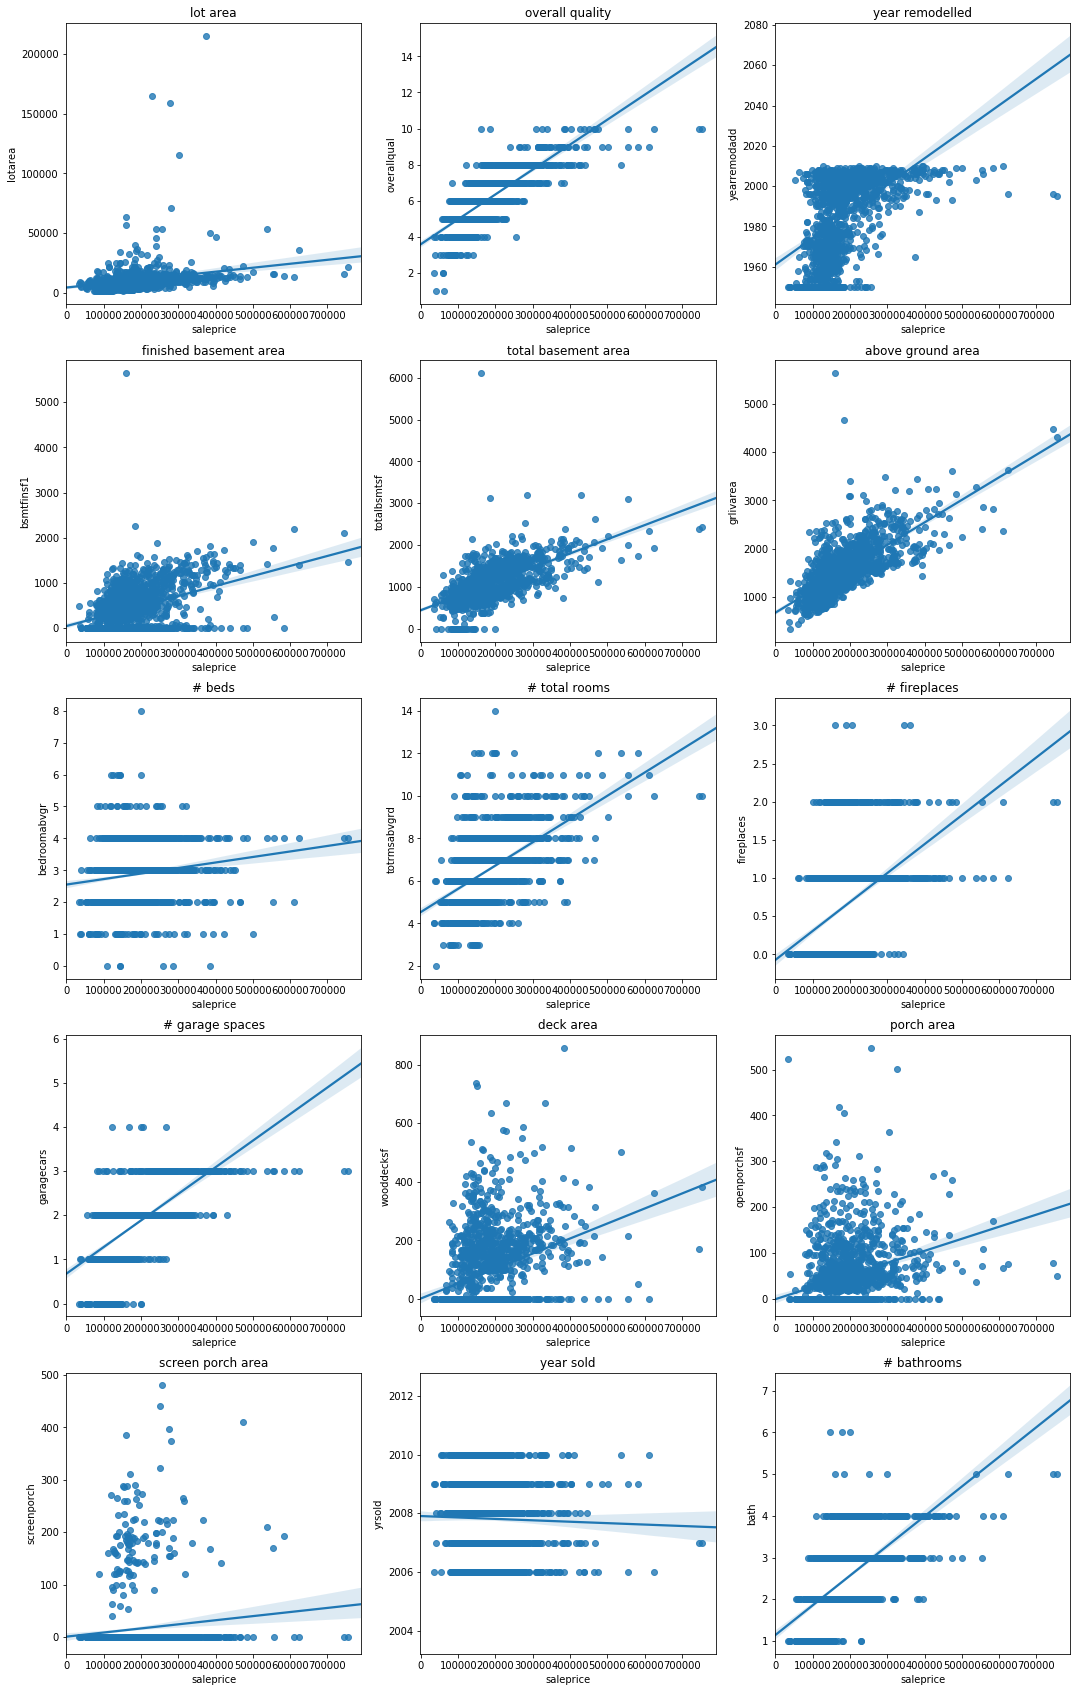

In [7]:
#look at relationship of numeric variables and sales price
plt.figure(figsize=(18,30))

plt.subplot(5,3,1)
sns.regplot(x="saleprice", y="lotarea", data=df, fit_reg=True)
plt.title('lot area')

plt.subplot(5,3,2)
sns.regplot(x="saleprice", y="overallqual", data=df, fit_reg=True)
plt.title('overall quality')

plt.subplot(5,3,3)
sns.regplot(x="saleprice", y="yearremodadd", data=df, fit_reg=True)
plt.title('year remodelled')

plt.subplot(5,3,4)
sns.regplot(x="saleprice", y="bsmtfinsf1", data=df, fit_reg=True)
plt.title('finished basement area')

plt.subplot(5,3,5)
sns.regplot(x="saleprice", y="totalbsmtsf", data=df, fit_reg=True)
plt.title('total basement area')

plt.subplot(5,3,6)
sns.regplot(x="saleprice", y="grlivarea", data=df, fit_reg=True)
plt.title('above ground area')

plt.subplot(5,3,7)
sns.regplot(x="saleprice", y="bedroomabvgr", data=df, fit_reg=True)
plt.title('# beds')

plt.subplot(5,3,8)
sns.regplot(x="saleprice", y="totrmsabvgrd", data=df, fit_reg=True)
plt.title('# total rooms')

plt.subplot(5,3,9)
sns.regplot(x="saleprice", y="fireplaces", data=df, fit_reg=True)
plt.title('# fireplaces')

plt.subplot(5,3,10)
sns.regplot(x="saleprice", y="garagecars", data=df, fit_reg=True)
plt.title('# garage spaces')

plt.subplot(5,3,11)
sns.regplot(x="saleprice", y="wooddecksf", data=df, fit_reg=True)
plt.title('deck area')

plt.subplot(5,3,12)
sns.regplot(x="saleprice", y="openporchsf", data=df, fit_reg=True)
plt.title('porch area')

plt.subplot(5,3,13)
sns.regplot(x="saleprice", y="screenporch", data=df, fit_reg=True)
plt.title('screen porch area')

plt.subplot(5,3,14)
sns.regplot(x="saleprice", y="yrsold", data=df, fit_reg=True)
plt.title('year sold')

plt.subplot(5,3,15)
sns.regplot(x="saleprice", y="bath", data=df, fit_reg=True)
plt.title('# bathrooms')
plt.show()


In [8]:
#based on graphs, drop 'yrsold', 'bedroomabvgr', 'screenporch', 'lotarea'
#transform to remove outliers and see if the variable can be useful: 'wooddecksf', 'openporchsf'
#'yearremodadd'

In [9]:
df = df.drop(['yrsold', 'bedroomabvgr', 'screenporch', 'lotarea'], axis=1)

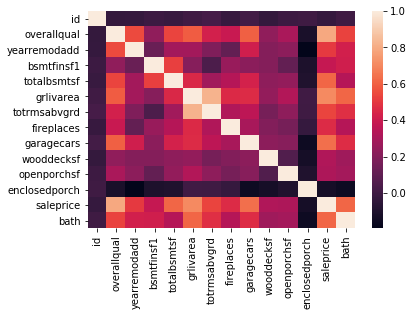

In [10]:
sns.heatmap(df.corr())

#from this we see that 'grlivarea', 'bedroomabvgr' and 'totrmsabvgrd' are all highly correlated, so we'll 
#drop 'totrmsabvgrd' and 'bedroomabvgr' and keep just 'grlivarea'
#also drop 'enclosedporch', which doesn't seem to correlate to price at all

In [11]:
df = df.drop(['enclosedporch', 'totrmsabvgrd'], axis=1)

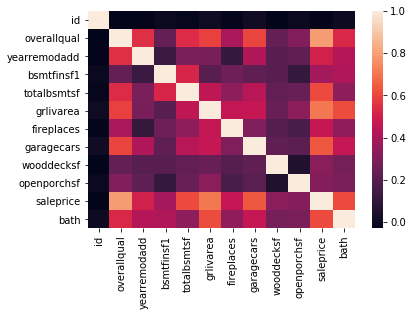

In [12]:
sns.heatmap(df.corr())

In [13]:
#pd.get_dummies(df.lotconfig, drop_first=True)
# append dummies to YouTube dataframe
df1 = pd.concat([df, pd.get_dummies(df['lotconfig'])], axis=1)
df2 = pd.concat([df, pd.get_dummies(df['neighborhood'])], axis=1)
df3 = pd.concat([df, pd.get_dummies(df['masvnrtype'])], axis=1)
df4 = pd.concat([df, pd.get_dummies(df['bsmtfintype1'])], axis=1)
df5 = pd.concat([df, pd.get_dummies(df['centralair'])], axis=1)
df6 = pd.concat([df, pd.get_dummies(df['kitchenqual'])], axis=1)
df7 = pd.concat([df, pd.get_dummies(df['garagetype'])], axis=1)

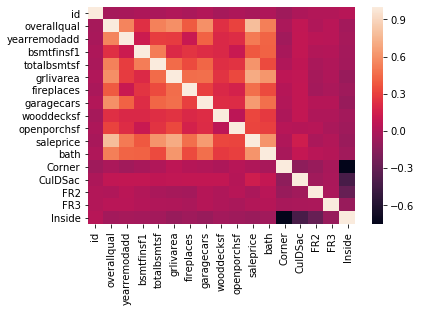

In [14]:
sns.heatmap(df1.corr())
#keep 'CulDSac'

In [15]:
df1 = df1[['id', 'CulDSac']]

In [16]:
df2.corr()
#drop SWISU, SawyerW, Veenker

,id,overallqual,yearremodadd,bsmtfinsf1,totalbsmtsf,grlivarea,fireplaces,garagecars,wooddecksf,openporchsf,...,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
id,1.000000,-0.028365,-0.021998,-0.005024,-0.015415,0.008273,-0.019772,0.016570,-0.029643,-0.000477,...,0.034188,-0.067622,-0.024950,0.034681,-0.008031,-0.031818,0.014985,-0.019097,0.021925,-0.023069
overallqual,-0.028365,1.000000,0.550684,0.239666,0.537808,0.593007,0.396765,0.600671,0.238923,0.308819,...,0.224693,0.368724,-0.148731,-0.062946,-0.179215,0.033059,0.224010,0.196736,0.125168,0.039575
yearremodadd,-0.021998,0.550684,1.000000,0.128451,0.291066,0.287389,0.112581,0.420622,0.205726,0.226298,...,0.097128,0.243558,-0.132494,-0.097119,-0.070968,0.050883,0.247736,0.089371,0.067139,0.020908
bsmtfinsf1,-0.005024,0.239666,0.128451,1.000000,0.522396,0.208171,0.260011,0.224054,0.204306,0.111761,...,0.143949,0.131004,-0.177889,-0.068065,0.032863,0.044973,-0.063893,0.109798,0.094962,0.071904
totalbsmtsf,-0.015415,0.537808,0.291066,0.522396,1.000000,0.454868,0.339519,0.434585,0.232019,0.247264,...,0.169117,0.293445,-0.163260,-0.063308,-0.047417,-0.013993,0.043137,0.140122,0.110743,0.052418
grlivarea,0.008273,0.593007,0.287389,0.208171,0.454868,1.000000,0.461679,0.467247,0.247433,0.330224,...,0.321450,0.179892,-0.019705,0.071806,-0.132106,0.031078,0.038667,0.091365,0.072790,0.004009
fireplaces,-0.019772,0.396765,0.112581,0.260011,0.339519,0.461679,1.000000,0.300789,0.200019,0.169405,...,0.127806,0.151202,-0.124373,-0.002665,-0.059902,-0.000906,-0.057416,0.046490,0.104839,0.076902
garagecars,0.016570,0.600671,0.420622,0.224054,0.434585,0.467247,0.300789,1.000000,0.226342,0.213569,...,0.197277,0.282752,-0.129297,-0.135536,-0.095160,0.045347,0.167551,0.111817,0.131576,0.037763
wooddecksf,-0.029643,0.238923,0.205726,0.204306,0.232019,0.247433,0.200019,0.226342,1.000000,0.058661,...,0.143770,0.108203,-0.098493,0.000332,0.005779,0.052260,-0.050058,0.074494,0.064709,0.066966
openporchsf,-0.000477,0.308819,0.226298,0.111761,0.247264,0.330224,0.169405,0.213569,0.058661,1.000000,...,0.073044,0.102858,0.009690,-0.007055,-0.078677,0.023844,0.205915,0.008808,0.010191,0.004633


In [17]:
df2 = df2.drop(['SWISU', 'SawyerW', 'Veenker'], axis=1)

In [18]:
df1 = pd.merge(df1, df2, how='inner')

In [19]:
df3.corr()
#drop HdBoard, ImStucc, Plywood, Other, Stone[1], Stucco, Wd Shng, None, BrkCmm

,id,overallqual,yearremodadd,bsmtfinsf1,totalbsmtsf,grlivarea,fireplaces,garagecars,wooddecksf,openporchsf,saleprice,bath,BrkCmn,BrkFace,None,Stone
id,1.000000,-0.028365,-0.021998,-0.005024,-0.015415,0.008273,-0.019772,0.016570,-0.029643,-0.000477,-0.021917,0.003105,-0.040379,-0.036425,0.024897,0.024760
overallqual,-0.028365,1.000000,0.550684,0.239666,0.537808,0.593007,0.396765,0.600671,0.238923,0.308819,0.790982,0.529906,-0.061362,0.224727,-0.397955,0.331584
yearremodadd,-0.021998,0.550684,1.000000,0.128451,0.291066,0.287389,0.112581,0.420622,0.205726,0.226298,0.507101,0.426079,-0.039818,0.096518,-0.240784,0.260178
bsmtfinsf1,-0.005024,0.239666,0.128451,1.000000,0.522396,0.208171,0.260011,0.224054,0.204306,0.111761,0.386420,0.419852,-0.007398,0.129103,-0.235217,0.188412
totalbsmtsf,-0.015415,0.537808,0.291066,0.522396,1.000000,0.454868,0.339519,0.434585,0.232019,0.247264,0.613581,0.339473,0.004345,0.170289,-0.340757,0.300793
grlivarea,0.008273,0.593007,0.287389,0.208171,0.454868,1.000000,0.461679,0.467247,0.247433,0.330224,0.708624,0.617494,-0.006930,0.163322,-0.246464,0.155787
fireplaces,-0.019772,0.396765,0.112581,0.260011,0.339519,0.461679,1.000000,0.300789,0.200019,0.169405,0.466929,0.341565,0.019022,0.132088,-0.204657,0.129780
garagecars,0.016570,0.600671,0.420622,0.224054,0.434585,0.467247,0.300789,1.000000,0.226342,0.213569,0.640409,0.468671,-0.013700,0.222338,-0.374556,0.284658
wooddecksf,-0.029643,0.238923,0.205726,0.204306,0.232019,0.247433,0.200019,0.226342,1.000000,0.058661,0.324413,0.279980,-0.008656,0.106905,-0.140296,0.077735
openporchsf,-0.000477,0.308819,0.226298,0.111761,0.247264,0.330224,0.169405,0.213569,0.058661,1.000000,0.315856,0.295422,0.004830,0.039857,-0.117854,0.123900


In [20]:
df3 = df3.drop(['BrkCmn'], axis=1)

In [21]:
df1 = pd.merge(df1, df3, how='inner')

In [22]:
df4.corr()

,id,overallqual,yearremodadd,bsmtfinsf1,totalbsmtsf,grlivarea,fireplaces,garagecars,wooddecksf,openporchsf,saleprice,bath,ALQ,BLQ,GLQ,LwQ,Rec,Unf
id,1.000000,-0.028365,-0.021998,-0.005024,-0.015415,0.008273,-0.019772,0.016570,-0.029643,-0.000477,-0.021917,0.003105,-0.016572,0.029997,-0.014934,-0.028664,0.000568,0.022917
overallqual,-0.028365,1.000000,0.550684,0.239666,0.537808,0.593007,0.396765,0.600671,0.238923,0.308819,0.790982,0.529906,-0.167359,-0.181707,0.433448,-0.093390,-0.170811,0.047055
yearremodadd,-0.021998,0.550684,1.000000,0.128451,0.291066,0.287389,0.112581,0.420622,0.205726,0.226298,0.507101,0.426079,-0.088081,-0.184964,0.401679,-0.116811,-0.238877,0.047523
bsmtfinsf1,-0.005024,0.239666,0.128451,1.000000,0.522396,0.208171,0.260011,0.224054,0.204306,0.111761,0.386420,0.419852,0.162801,0.068529,0.497436,-0.032485,0.050661,-0.628690
totalbsmtsf,-0.015415,0.537808,0.291066,0.522396,1.000000,0.454868,0.339519,0.434585,0.232019,0.247264,0.613581,0.339473,-0.013082,-0.041752,0.317396,-0.016780,-0.030998,-0.115146
grlivarea,0.008273,0.593007,0.287389,0.208171,0.454868,1.000000,0.461679,0.467247,0.247433,0.330224,0.708624,0.617494,-0.133668,-0.117177,0.193521,0.001835,-0.061807,0.052649
fireplaces,-0.019772,0.396765,0.112581,0.260011,0.339519,0.461679,1.000000,0.300789,0.200019,0.169405,0.466929,0.341565,0.018233,0.022093,0.114646,-0.016295,-0.031510,-0.085328
garagecars,0.016570,0.600671,0.420622,0.224054,0.434585,0.467247,0.300789,1.000000,0.226342,0.213569,0.640409,0.468671,-0.068600,-0.150471,0.321159,-0.090981,-0.130725,-0.011793
wooddecksf,-0.029643,0.238923,0.205726,0.204306,0.232019,0.247433,0.200019,0.226342,1.000000,0.058661,0.324413,0.279980,0.034171,-0.019927,0.172313,-0.043465,-0.108316,-0.064042
openporchsf,-0.000477,0.308819,0.226298,0.111761,0.247264,0.330224,0.169405,0.213569,0.058661,1.000000,0.315856,0.295422,-0.056607,-0.049432,0.152865,-0.041716,-0.061017,0.010846


In [23]:
df4 = df4[['id', 'GLQ']]

In [24]:
df1 = pd.merge(df1, df4, how='inner')

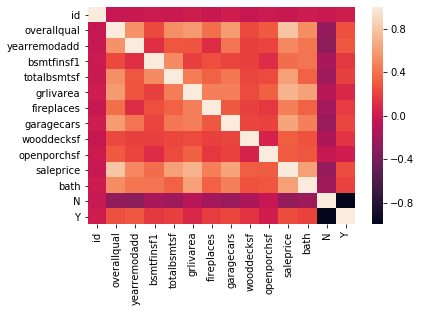

In [25]:
sns.heatmap(df5.corr())

In [26]:
df5 = df5[['id', 'Y']]

In [27]:
df1 = pd.merge(df1, df5, how='inner')

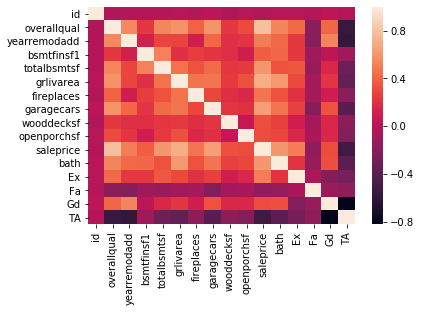

In [28]:
sns.heatmap(df6.corr())

In [29]:
df6 = df6[['id', 'Gd', 'Ex']]

In [30]:
df1 = pd.merge(df1, df6, how='inner')

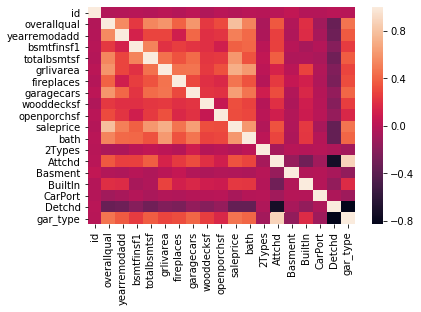

In [31]:
df7['gar_type'] = df7['Attchd']+df7['BuiltIn']
sns.heatmap(df7.corr())

In [32]:
df7 = df7[['id', 'gar_type']]

In [33]:
df1 = pd.merge(df1, df7, how='inner')

In [34]:
df = pd.merge(df, df1, how='inner')

In [35]:
df = df.drop(['lotconfig', 'neighborhood', 'garagetype', 'exterior1st', 'exterior2nd', 'masvnrtype',
              'bsmtfintype1', 'kitchenqual', 'centralair'], axis=1)

,id,overallqual,yearremodadd,bsmtfinsf1,totalbsmtsf,grlivarea,fireplaces,garagecars,wooddecksf,openporchsf,...,StoneBr,Timber,BrkFace,None,Stone,GLQ,Y,Gd,Ex,gar_type
0,1,7,2003,706,856,1710,0,2,0,61,...,0,0,1,0,0,1,1,1,0,1
1,2,6,1976,978,1262,1262,1,2,298,0,...,0,0,0,1,0,0,1,0,0,1
2,3,7,2002,486,920,1786,1,2,0,42,...,0,0,1,0,0,1,1,1,0,1
3,4,7,1970,216,756,1717,1,3,0,35,...,0,0,0,1,0,0,1,1,0,0
4,5,8,2000,655,1145,2198,1,3,192,84,...,0,0,1,0,0,1,1,1,0,1
5,6,5,1995,732,796,1362,0,2,40,30,...,0,0,0,1,0,1,1,0,0,1
6,7,8,2005,1369,1686,1694,1,2,255,57,...,0,0,0,0,1,1,1,1,0,1
7,8,7,1973,859,1107,2090,2,2,235,204,...,0,0,0,0,1,0,1,0,0,1
8,9,7,1950,0,952,1774,2,2,90,0,...,0,0,0,1,0,0,1,0,0,0
9,10,5,1950,851,991,1077,2,1,0,4,...,0,0,0,1,0,1,1,0,0,1
